#  Modeling and feature importance visual

## Feature Selection

In this section, I will select specific features for model training. The original dataset contains 265 features, most of which are categorical attributes, dominantly the list of drug names that are approved as pain medications that need special AED licensed prescriber.Here,my main target is to predict the overdoses using the  the list of prescriber specialists with NPI information and the FDA approved drug lists. The data set has only total opiod cliams and total claim counts and i took the standard prescription for opiod drugs is 84 days which is 12 weeks. Therefore, an additional feature was created in the data cleaning, pre processing that shows avg_op_supply which i limit to the standard to be 84 and any ones who prescribes the category of medications under the controlled substance act(CSA). The CSA is used for organizing drugs based on the risk of abuse or harm to users in five and my capestone focuses on the approved by [FDA](https://www.fda.gov/drugs/drugsafety/informationbydrugclass/ucm251735.htm) and [DEA](https://www.deadiversion.usdoj.gov/schedules/) to be prescribed by licensed and certified health professional.  These drug lists that are considered controlled substances under the Controlled Substances Act (CSA) are divided into five schedules.  An updated and complete list of the schedules is published annually in [Title 21 Code of Federal Regulations (C.F.R.) §§ 1308.11 through 1308.15](https://www.deadiversion.usdoj.gov/21cfr/cfr/2108cfrt.htm).

Therfore, for analysis and visualization  i only took those physicians who have greater opood cliams from the center for medical services dataset and created a feature average opiod supply  by dividing the total cliam by the opiod cliam and reviewed those specialists who prescribe more than the set limit of 12 weeks and that also become a new feature that measures the length of opiod prescription supply more than 84 days. As been visualized in notebook 1.3, significant amount of prescribers are family physicians, followed by internal medicine,nurse practitioners, Physicain Assistant and physical medicine and rehabilitation. When i group based on speciality and the vsuals can be accessed   [here top 20](https://plot.ly/~kiros/112) and the lists are as follows:-
  > $'Cardiology', 'Nephrology', 'Endocrinology', 'Neurology'  'General Practice', 'Internal Medicine', 'Urology'$,   > $'Pulmonary Disease', 'Gastroenterology', 'Family Practice', 'Infectious Disease','Psychiatry'$ 
  >$'Nurse Practitioner', 'Ophthalmology','Allergy/Immunology', 'Otolaryngology', 'Psychiatry & Neurology'$ , $'Rheumatology', 'Dermatology', 'Obstetrics/Gynecology'$

In [1]:
# importing necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(2018)

# Configure visual settings:
from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})
plt.style.use('fivethirtyeight')
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
## Read Data
df=pd.read_csv('./inputs/cleaned_prescriber_info18.csv')
df.head()[:2]

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [3]:
print(df.shape)

(25000, 264)


In [4]:
opioids=pd.read_csv('./inputs/list_opioids.csv')

In [5]:
name=opioids['Drug Name']
import re
new_name=name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns=df.columns
Abandoned_variables = set(columns).intersection(set(new_name))
Kept_variable=[]
for each in columns:
    if each in Abandoned_variables:
        pass
    else:
        Kept_variable.append(each)

In [6]:
df=df[Kept_variable]
print(df.shape)

(25000, 253)


In [7]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [8]:
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(',', '')
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(' ', '')
df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].astype(float)

In [9]:
df.isnull().sum()

NPI                                  0
Gender                               0
State                                0
Credentials                         82
Specialty                            0
NPPES Provider Last Name          2610
NPPES Provider First Name         2610
NPPES Provider ZIP Code           2610
NPPES Provider State                 0
Totalclaimcount                      0
OpioidClaimCount                     0
ACYCLOVIR                            0
ADVAIR.DISKUS                        0
AGGRENOX                             0
ALENDRONATE.SODIUM                   0
ALLOPURINOL                          0
ALPRAZOLAM                           0
AMIODARONE.HCL                       0
AMITRIPTYLINE.HCL                    0
AMLODIPINE.BESYLATE                  0
AMLODIPINE.BESYLATE.BENAZEPRIL       0
AMOXICILLIN                          0
AMOX.TR.POTASSIUM.CLAVULANATE        0
AMPHETAMINE.SALT.COMBO               0
ATENOLOL                             0
ATORVASTATIN.CALCIUM     

In [10]:
df.fillna(0,inplace = True)

In [11]:
df.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty',
       'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State', 'Totalclaimcount',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=253)

In [12]:
df.drop(['NPPES Provider Last Name', 'NPPES Provider First Name','NPPES Provider ZIP Code',
         'NPPES Provider State'], axis =1, inplace = True)

In [13]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [14]:
train,test = train_test_split(df,test_size=0.3,random_state=42)
print(train.shape)
print(test.shape)

(17500, 249)
(7500, 249)


In [15]:
Categorical_columns=['Gender','State','Credentials','Specialty']
for col in Categorical_columns:
    train[col]=pd.factorize(train[col], sort=True)[0]
    test[col] =pd.factorize(test[col],sort=True)[0]

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

y = train['Opioid_Prescriber']

X = train.iloc[:,1:245]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
train.iloc[:,1:245][:2]

,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
4913,0,18,517,48,153,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9338,0,6,284,25,229,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0


In [18]:
X =train.iloc[:,1:245]
y = train['Opioid_Prescriber']

In [19]:
print("====================================Models,5Fold CV and Test Scores==========================================")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regrssion: ")
print("Five cross-val score means: {}".format(cross_val_score(lr_model, X_train, y_train, cv = 5).mean()))
print("Test score:", lr_model.score(X_test, y_test))
print("-----------------------------------------------------------------------------------------------------------------")

knn_reg = KNeighborsRegressor()
knn_reg_params = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}
gs_knn_reg = GridSearchCV(knn_reg, knn_reg_params)
gs_knn_reg.fit(X_train, y_train)

print("k-nearest:")
print("Five cross-val score means: {}".format(cross_val_score(gs_knn_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_knn_reg.score(X_test, y_test))
print("------------------------------------------------------------------------------------------------------------")

tree_reg = DecisionTreeRegressor()
tree_reg_params = {
#     'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}
gs_tree_reg = GridSearchCV(tree_reg, tree_reg_params)
gs_tree_reg.fit(X_train, y_train)

print("Decision Tree Regressor: ")
print("Five cross-val score means: {}".format(cross_val_score(gs_tree_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_tree_reg.score(X_test, y_test))
print("------------------------------------------------------------------------------------------------------------")

bag_reg = BaggingRegressor()
bag_reg_params = {}

gs_bag_reg = GridSearchCV(bag_reg, bag_reg_params)
gs_bag_reg.fit(X_train, y_train)

print("Bagging Regressor: ")
print("Five cross-val score means: {}".format(cross_val_score(gs_bag_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_bag_reg.score(X_test, y_test))
print("-----------------------------------------------------------------------------------------------------------")

rf_reg = RandomForestRegressor()
rf_reg_params = {}

gs_rf_reg = GridSearchCV(rf_reg, rf_reg_params)
gs_rf_reg.fit(X_train, y_train)

print("Random Forest Regressor: ")
print("Five cross-val score means: {}".format(cross_val_score(gs_rf_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_rf_reg.score(X_test, y_test))
print("------------------------------------------------------------------------------------------------------------")

ada_reg = AdaBoostRegressor()
ada_reg_params = {}

gs_ada_reg = GridSearchCV(ada_reg, ada_reg_params)
gs_ada_reg.fit(X_train, y_train)

print("AdaBoost Regressor:")
print("Five cross-val score means: {}".format(cross_val_score(gs_ada_reg, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_ada_reg.score(X_test, y_test))
print("----------------------------------------------------------------------------------------------------------")

svr = SVR()
svr_params = {
    'C':[.1,1,.1]
}

gs_svr = GridSearchCV(svr, svr_params)
gs_svr.fit(X_train, y_train)

print("Support Vector Regressor:")
print("five cross-val score means: {}".format(cross_val_score(gs_svr, X_train, y_train, cv = 5).mean()))
print("Test score:", gs_svr.score(X_test, y_test))
print("----------------------------------------------------------------------------------------------------------------")

====================================Models,5Fold CV and Test Scores==========================================
Linear Regrssion: 
Five cross-val score means: 0.558833316275933
Test score: 0.5913652537140699
-----------------------------------------------------------------------------------------------------------------
k-nearest:
Five cross-val score means: 0.5671962663791562
Test score: 0.5269664604001213
------------------------------------------------------------------------------------------------------------
Decision Tree Regressor: 
Five cross-val score means: 0.02158379846227975
Test score: 0.3185779003291218
------------------------------------------------------------------------------------------------------------
Bagging Regressor: 
Five cross-val score means: 0.5475622646936321
Test score: 0.6222648709399
-----------------------------------------------------------------------------------------------------------
Random Forest Regressor: 
Five cross-val score means: 0.561769059

In [20]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [21]:
print("=============================================<Root-Mean-Square Error>============================================")
from sklearn.metrics import mean_squared_error
import numpy as np
print("RMSE scores")
print("\n")
print("LR:\n-------------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(lr_model.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(lr_model.predict(X_test), y_test)))

print("\n")
print("KNN:\n-------------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_knn_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_knn_reg.predict(X_test), y_test)))

print("\n")
print("Tree:\n-----------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_tree_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_tree_reg.predict(X_test), y_test)))

print("\n")
print("Bag:\n------------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_bag_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_bag_reg.predict(X_test), y_test)))

print("\n")
print("Random Forest:\n--------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_rf_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_rf_reg.predict(X_test), y_test)))

print("\n")
print("AdaBoost:\n------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_ada_reg.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_ada_reg.predict(X_test), y_test)))

print("\n")
print("SVR:\n---------------------------------------------------------------------------------------------------")
print("Train score:", np.sqrt(mean_squared_error(gs_svr.predict(X_train), y_train)))
print("Test score:", np.sqrt(mean_squared_error(gs_svr.predict(X_test), y_test)))

=============================================<Root-Mean-Square Error>============================================
RMSE scores


LR:
-----------------------------------------------------------------------------------------------------------
Train score: 5.196921296239649
Test score: 7.115028225059413


KNN:
--------------------------------------------------------------------------------------------------------
Train score: 6.440482734791147
Test score: 7.65517192118225


Tree:
------------------------------------------------------------------------------------------------------
Train score: 0.0
Test score: 9.187917531814735


Bag:
----------------------------------------------------------------------------------------------------------
Train score: 3.055023279468626
Test score: 6.840733461092772


Random Forest:
------------------------------------------------------------------------------------------
Train score: 3.107677497516663
Test score: 7.479546815912617


AdaBoost:
-------------

According to the models the data was split in to training,validation and test in the ratio of 70:30:1. The models were developed and trained  using the training dataset and then calculated the root mean square error(RMSE) for each of the models pipelined above. Then i tried to compare the models using the RMSE of the validation performance. The model with the lowest RMSE is technically supposed to be chosen as highest performing model. bagging tree was with the lowest RMSE(3.01 on traing and 6.8 on test). The thing here is that to generalize the model its important to  evaluate it using the methods you choose.

In [22]:
df.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty', 'Totalclaimcount',
       'OpioidClaimCount', 'ACYCLOVIR', 'ADVAIR.DISKUS', 'AGGRENOX',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=249)

#### 3. Model Building step 2_Rework with tunning

In [23]:
ineligible_noOpioidsPrescriber = (df['Opioid_Prescriber'] == 0) & (df['op_longer'] == 0)
ineligible_yesOpioid_Prescriber = (df['Opioid_Prescriber'] == 0) & (df['op_longer'] == 1)
eligible_noOpioid_Prescriber = (df['Opioid_Prescriber'] == 1) & (df['op_longer'] == 0)
eligible_yesOpioid_Prescriber = (df['Opioid_Prescriber'] == 1) & (df['op_longer'] == 1)
print(
"Ineligible and not Opioid_Prescriber:\t\t", df[ineligible_noOpioidsPrescriber].shape[0],
"\nIneligible and has a Opioid_Prescriber:\t", df[ineligible_yesOpioid_Prescriber].shape[0],
"\nEligible and noOpioid_Prescriber:\t\t", df[eligible_noOpioid_Prescriber].shape[0],
"\nEligible and has prescribed opiods:\t", df[eligible_yesOpioid_Prescriber].shape[0])

Ineligible and not Opioid_Prescriber:		 11123 
Ineligible and has a Opioid_Prescriber:	 0 
Eligible and noOpioid_Prescriber:		 4 
Eligible and has prescribed opiods:	 13331


In [24]:
import re
from sklearn import svm
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation,metrics
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [26]:
# df.drop(columns=[''], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [27]:
df.columns

Index(['NPI', 'State', 'Credentials', 'Specialty', 'Totalclaimcount',
       'OpioidClaimCount', 'ACYCLOVIR', 'ADVAIR.DISKUS', 'AGGRENOX',
       'ALENDRONATE.SODIUM',
       ...
       'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber', 'Gender_M'],
      dtype='object', length=249)

In [28]:
df.shape

(25000, 249)

In [29]:
# Ustandardization and applying all models at once
ss  = StandardScaler()

logreg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=14, random_state=42)
adb = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [30]:
# making pipeline for choosing best model
pipe_logreg = Pipeline([
    ('ss', ss),
    ('logreg', logreg)
])
pipe_rfc = Pipeline([
    ('ss', ss),
    ('rfc', rfc),
])
pipe_adb = Pipeline([
    ('ss', ss),
    ('adb', adb)
])

In [31]:
%%time
pipes    = [ 
    pipe_logreg, 
    pipe_rfc, 
    pipe_adb,
]
pipe_idx = {0: 'Logistic Regression', 
            1: 'Random Forest', 
            2: 'Adaboost'
           }

for idx, pipe in enumerate(pipes):
    pipe.fit(X_train, y_train)
    print('\nScore Train/Test: %s' % pipe_idx[idx])
    print(pipe.score(X_train, y_train))
    print(pipe.score(X_test, y_test))
# print('Best params: %s' % pipe.best_params_)


Score Train/Test: Logistic Regression
0.8729904761904762
0.8464

Score Train/Test: Random Forest
0.9954285714285714
0.8731428571428571

Score Train/Test: Adaboost
0.44739047619047617
0.4342857142857143
CPU times: user 2min 47s, sys: 3.5 s, total: 2min 51s
Wall time: 2min 45s


In [32]:
## Read Data
df=pd.read_csv('./inputs/cleaned_prescriber_info18.csv')
df.head()[:2]

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [33]:
print(df.shape)

(25000, 264)


In [34]:
opioids=pd.read_csv('./inputs/list_opioids.csv')

In [35]:
name=opioids['Drug Name']
import re
new_name=name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns=df.columns
Abandoned_variables = set(columns).intersection(set(new_name))
Kept_variable=[]
for each in columns:
    if each in Abandoned_variables:
        pass
    else:
        Kept_variable.append(each)

In [36]:
df=df[Kept_variable]
print(df.shape)

(25000, 253)


In [37]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [38]:
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(',', '')
# df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].str.replace(' ', '')
df['NPPES Provider ZIP Code'] = df['NPPES Provider ZIP Code'].astype(float)

In [39]:
df.isnull().sum()

NPI                                  0
Gender                               0
State                                0
Credentials                         82
Specialty                            0
NPPES Provider Last Name          2610
NPPES Provider First Name         2610
NPPES Provider ZIP Code           2610
NPPES Provider State                 0
Totalclaimcount                      0
OpioidClaimCount                     0
ACYCLOVIR                            0
ADVAIR.DISKUS                        0
AGGRENOX                             0
ALENDRONATE.SODIUM                   0
ALLOPURINOL                          0
ALPRAZOLAM                           0
AMIODARONE.HCL                       0
AMITRIPTYLINE.HCL                    0
AMLODIPINE.BESYLATE                  0
AMLODIPINE.BESYLATE.BENAZEPRIL       0
AMOXICILLIN                          0
AMOX.TR.POTASSIUM.CLAVULANATE        0
AMPHETAMINE.SALT.COMBO               0
ATENOLOL                             0
ATORVASTATIN.CALCIUM     

In [40]:
df.fillna(0,inplace = True)

In [41]:
df.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty',
       'NPPES Provider Last Name', 'NPPES Provider First Name',
       'NPPES Provider ZIP Code', 'NPPES Provider State', 'Totalclaimcount',
       ...
       'VYTORIN', 'WARFARIN.SODIUM', 'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL',
       'ZOLPIDEM.TARTRATE', 'avg_op_supply', 'op_longer', 'Opioid_Prescriber',
       'op_prescriber'],
      dtype='object', length=253)

In [42]:
df.drop(['NPPES Provider Last Name', 'NPPES Provider First Name','NPPES Provider ZIP Code',
         'NPPES Provider State'], axis =1, inplace = True)

In [43]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [44]:
df.head()[:2]

,NPI,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,129,29,0,0,0,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,537,0,0,61,0,...,0,0,16,0,0,0,4.5,0.0,0,0.0


In [46]:
train,test = train_test_split(df,test_size=0.3,random_state=42)
print(train.shape)
print(test.shape)

(17500, 249)
(7500, 249)


In [47]:
Categorical_columns=['Gender','State','Credentials','Specialty']
for col in Categorical_columns:
    train[col]=pd.factorize(train[col], sort=True)[0]
    test[col] =pd.factorize(test[col],sort=True)[0]

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
y = train['Opioid_Prescriber']

X = train.iloc[:,1:245]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
train.iloc[:,1:245][:2]

,Gender,State,Credentials,Specialty,Totalclaimcount,OpioidClaimCount,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
4913,0,18,517,48,153,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9338,0,6,284,25,229,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0


In [50]:
X =train.iloc[:,1:245]
y = train['Opioid_Prescriber']

In [51]:
rfc=RandomForestClassifier()

In [52]:
hyperparameters={
                'n_estimators': [100],
                'max_depth': [30],
                'min_samples_split': [30],
                'class_weight': ['balanced']
}
                
rfgrid = GridSearchCV(rfc, hyperparameters, cv=3, scoring='roc_auc')

In [53]:
# df[columns] = df.columns.apply(lambda x: float(x.split()[0].replace(',', '')))
# df[columns] = df.columns.apply(lambda x: float(x.split()[0].replace(',', '')))

In [54]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [55]:
from sklearn.preprocessing import scale
X_test = scale(X_test)

In [56]:
df1 = df[df['Opioid_Prescriber'] == 0]
df2 = df[df['Opioid_Prescriber'] == 1]

In [57]:
print ('total', len(df))
print ('Non opiod', len(df1))
print ('opiod', len(df2))

total 25000
Non opiod 11123
opiod 13335


##### Repeating the above process after checking the existance of Data gap

In [58]:
y = df.Opioid_Prescriber
X = df.drop(['Opioid_Prescriber','Speciality' "op_longer",'op_prescriber','avg_op_supply'], axis =1)

In [59]:
# Verifying shapes are the same 

X_train.shape

(13125, 244)

In [60]:
# Verifying shapes are the same 


y_train.shape

(13125,)

In [61]:
# Verifying shapes are the same 

X_test.shape

(4375, 244)

In [62]:
# Verifying shapes are the same 

y_test.shape

(4375,)

In [ ]:
# !pip install tpot

In [63]:

# TPOT used to optimize and model pipelines# TPOT u 

from tpot import TPOTClassifier

In [64]:
pipeline_optimizer = TPOTClassifier(generations=2, population_size=20,cv=5, verbosity=2,
                      config_dict='TPOT light')

In [65]:
pipeline_optimizer.fit(X_train,y_train)

Optimization Progress:  68%|██████▊   | 41/60 [37:08<25:40, 81.08s/pipeline]   

Generation 1 - Current best internal CV score: 0.8687291181299026


Generation 2 - Current best internal CV score: 0.8687291181299026

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=8)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT...e_selection.VarianceThreshold': {'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=2, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=20, periodic_checkpoint_folder=None,
        population_size=20, random_state=None, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [66]:
print(pipeline_optimizer.score(X_test, y_test))

0.8637714285714285


In [67]:
# Machine learning library/functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

In [68]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=13, min_samples_split=12)

In [69]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
dt.score(X_train,y_train)

0.881447619047619

In [71]:
dt.score(X_test,y_test)

0.8562285714285714

In [73]:
cross_val_score(dt, X_test,y_test,scoring='accuracy',cv=5).mean()

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.8532112382876257

In [75]:
rf = RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=13, min_samples_split=12)

In [76]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
rf.score(X_train,y_train)

0.8758857142857143

In [78]:
rf.score(X_test,y_test)

0.8669714285714286

In [ ]:
# pd.DataFrame(important_features).plot(kind = 'barh', grid=True)

In [ ]:
# pd.DataFrame(important_features).plot(kind = 'barh', grid=False)

In [86]:
# Importing more packages for model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.svm import LinearSVC

In [87]:
y_pred = rf.predict(X_test)

In [88]:
# Function to allow us to obtain aucroc score for a multi-class y variable

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(y_test)

    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    return roc_auc_score(y_test, y_pred, average=average)

In [89]:
multiclass_roc_auc_score(y_test,y_pred)

0.5122934678929896

In [90]:
metrics.precision_score(y_test, y_pred,average='micro')

0.8669714285714286

In [91]:
metrics.recall_score(y_test, y_pred, average='macro')

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.028210924936126643

In [92]:
# Function to produce confusion matrix, precision, recall and f1-score# Functio 

def classifications(y_test, y_pred):
    print('Mean accuracy score %s ' % metrics.accuracy_score(y_test, y_pred), '\n')
    print(confusion_matrix(y_test, y_pred), '\n')
    print(classification_report(y_test, y_pred))

In [93]:
classifications(y_test,y_pred)

Mean accuracy score 0.8669714285714286  

[[1727  184    0 ...    0    0    0]
 [ 299 2066    0 ...    0    0    0]
 [   6    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]] 

             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1911
          1       0.92      0.87      0.89      2365
         11       0.00      0.00      0.00         6
         12       0.00      0.00      0.00         4
         13       0.00      0.00      0.00         4
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         4
         16       0.00      0.00      0.00         2
         17       0.00      0.00      0.00         1
         18       0.00      0.00      0.00         3
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00         4
         21       0.00      0.00      

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [94]:
cm = confusion_matrix(y_test,y_pred)

In [95]:
cm

array([[1727,  184,    0, ...,    0,    0,    0],
       [ 299, 2066,    0, ...,    0,    0,    0],
       [   6,    0,    0, ...,    0,    0,    0],
       ...,
       [   1,    0,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0]])

In [96]:
def roc(probas, true, step=0.01):
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labesl vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="r")
    plt.plot([0,1],[0,1], color='y', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();

##### Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_c = DecisionTreeClassifier(max_depth=5)


params = {
    'max_depth':[1, 2, 3, 5, 7, 10],
    'max_features':[1, 2,  3, 5]
}


gs_dt = GridSearchCV(estimator = dt_c, param_grid = params)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_score_)
print(gs_dt.best_params_)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.7468190476190476
{'max_depth': 7, 'max_features': 5}


In [98]:
dt_c.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

##### Random Forest Classifier

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()


params = {
    'n_estimators': [3,5,7,10], 
    'max_features': [3, 5, 7],
    'max_depth': [1, 2 , 3, 4]
}
gs_rf = GridSearchCV(rf_c, param_grid=params)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
print(gs_rf.best_params_)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.856
{'max_depth': 4, 'max_features': 7, 'n_estimators': 7}


In [101]:
rf_c.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

##### AdaBoost

In [102]:
from sklearn.ensemble import AdaBoostClassifier
ada_r = AdaBoostClassifier()

params = {
    'n_estimators':range(1,7)
}
gs_ada = GridSearchCV(ada_r, param_grid = params)
gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
print(gs_ada.best_params_)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.8552380952380952
{'n_estimators': 6}


In [103]:
gs_ada.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__base_estimator', 'estimator__learning_rate', 'estimator__n_estimators', 'estimator__random_state', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

##### CNN

In [105]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [106]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [107]:
from keras import regularizers
import numpy as np
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

np.random.seed(42)

model= Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 1
#first layer defines the shape of the input which is X_train.shape
#then add a layer defining the activation function - relu is on of the most popular
#activation - should the neuron be fired or not - relu is quite efficient.
model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
#A dense layer is a classic fully connected neural network layer : each input node is connected to each output node.
#for this layer use the sigmoid activation function
#sigmoid will assign a propability to each tag (total output = 1) since its a classification problem
model.add(Dense(n_output, activation='sigmoid'))

#now we compile the model
#optimizer is the function used to search for the right weights
#here we are using Adaptive Moment Estimation (Adam) that also uses adaptive learning rates
#The loss function, also called the objective function is the evaluation of the model used by the optimizer 
# to navigate the weight space; only accuracy is supported at the moment for metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', 
                metrics=['acc'])

#early_stop = EarlyStopping(monitor='val_loss', min_delta=0) 


history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                      epochs=30, batch_size=None)
                     # callbacks=[early_stop])

Train on 13125 samples, validate on 4375 samples
Epoch 1/30
13125/13125 [==============================] - 3s 265us/step - loss: -15.2629 - acc: 0.6035 - val_loss: -16.4067 - val_acc: 0.6473
Epoch 2/30
13125/13125 [==============================] - 2s 128us/step - loss: -16.8374 - acc: 0.6841 - val_loss: -16.3960 - val_acc: 0.6891
Epoch 3/30
13125/13125 [==============================] - 2s 126us/step - loss: -16.9694 - acc: 0.7259 - val_loss: -16.5211 - val_acc: 0.7161
Epoch 4/30
13125/13125 [==============================] - 2s 134us/step - loss: -17.0732 - acc: 0.7387 - val_loss: -16.3704 - val_acc: 0.7488
Epoch 5/30
13125/13125 [==============================] - 2s 125us/step - loss: -17.1284 - acc: 0.7622 - val_loss: -16.3839 - val_acc: 0.7166
Epoch 6/30
13125/13125 [==============================] - 2s 135us/step - loss: -17.0763 - acc: 0.7595 - val_loss: -16.3532 - val_acc: 0.7456
Epoch 7/30
13125/13125 [==============================] - 2s 128us/step - loss: -17.1946 - acc: 0.7

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


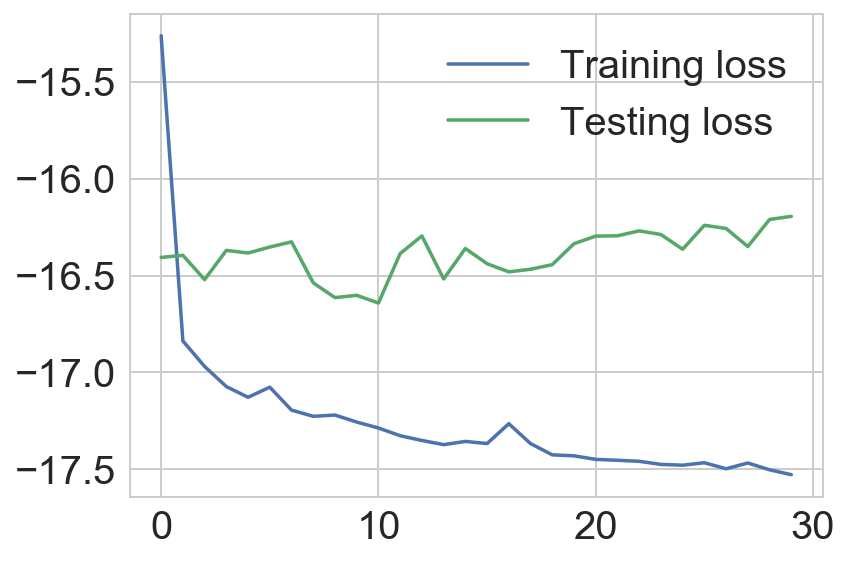

In [108]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [109]:
history.history['acc'][-1], history.history['val_acc'][-1]

(0.8586666666666667, 0.8052571428162711)